# Predicting heart disease using machine learning

## Data

1. age: Displays the age of the individual.

2. sex: Displays the gender of the individual using the following format:
    * 1 = male 
    * 0 = female

3. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format:
    * 0 = typical angina 
    * 1 = atypical angina 
    * 2 = non — anginal pain 
    * 3 = asymptotic

4. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit).
    > anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    * If fasting blood sugar > 120mg/dl then : 1 (true) else:
    * 0 (false) '>126' mg/dL signals diabetes

7.  restecg- Resting ECG : displays resting electrocardiographic results
    * 0 = normal
    * 1 = having ST-T wave abnormality 
    * 2 = left ventricular hyperthrophy

8. thalach- Max heart rate achieved:
    > displays the max heart rate achieved by an individual.

9. exang- Exercise induced angina:
    * 1 = yes
    * 0 = no

10. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. slope- Slope of the peak exercise ST segment:
    * 0 = upsloping: better heart rate with excercise (uncommon) 
    * 1 = flat: minimal change (typical healthy heart) 
    * 2 = downsloping: signs of unhealthy heart

12. ca- Number of major vessels (0–3) colored by flourosopy:
    * displays the value as integer or float.

13. thal : Displays the thalassemia:
    * 1,3 = normal 
    * 6 = fixed defect
    * 7 = reversible defect: no proper blood movement when excercising

14. target : Displays whether the individual is suffering from heart disease or not:
    * 1 = yes
    * 0 = no

In [1]:
# Importing all the tools required
# For EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

### Load data

In [2]:
df=pd.read_csv('heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


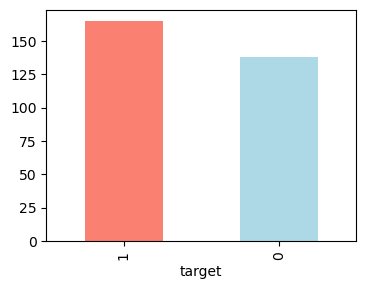

In [4]:
plt.figure(figsize=(4, 3))
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

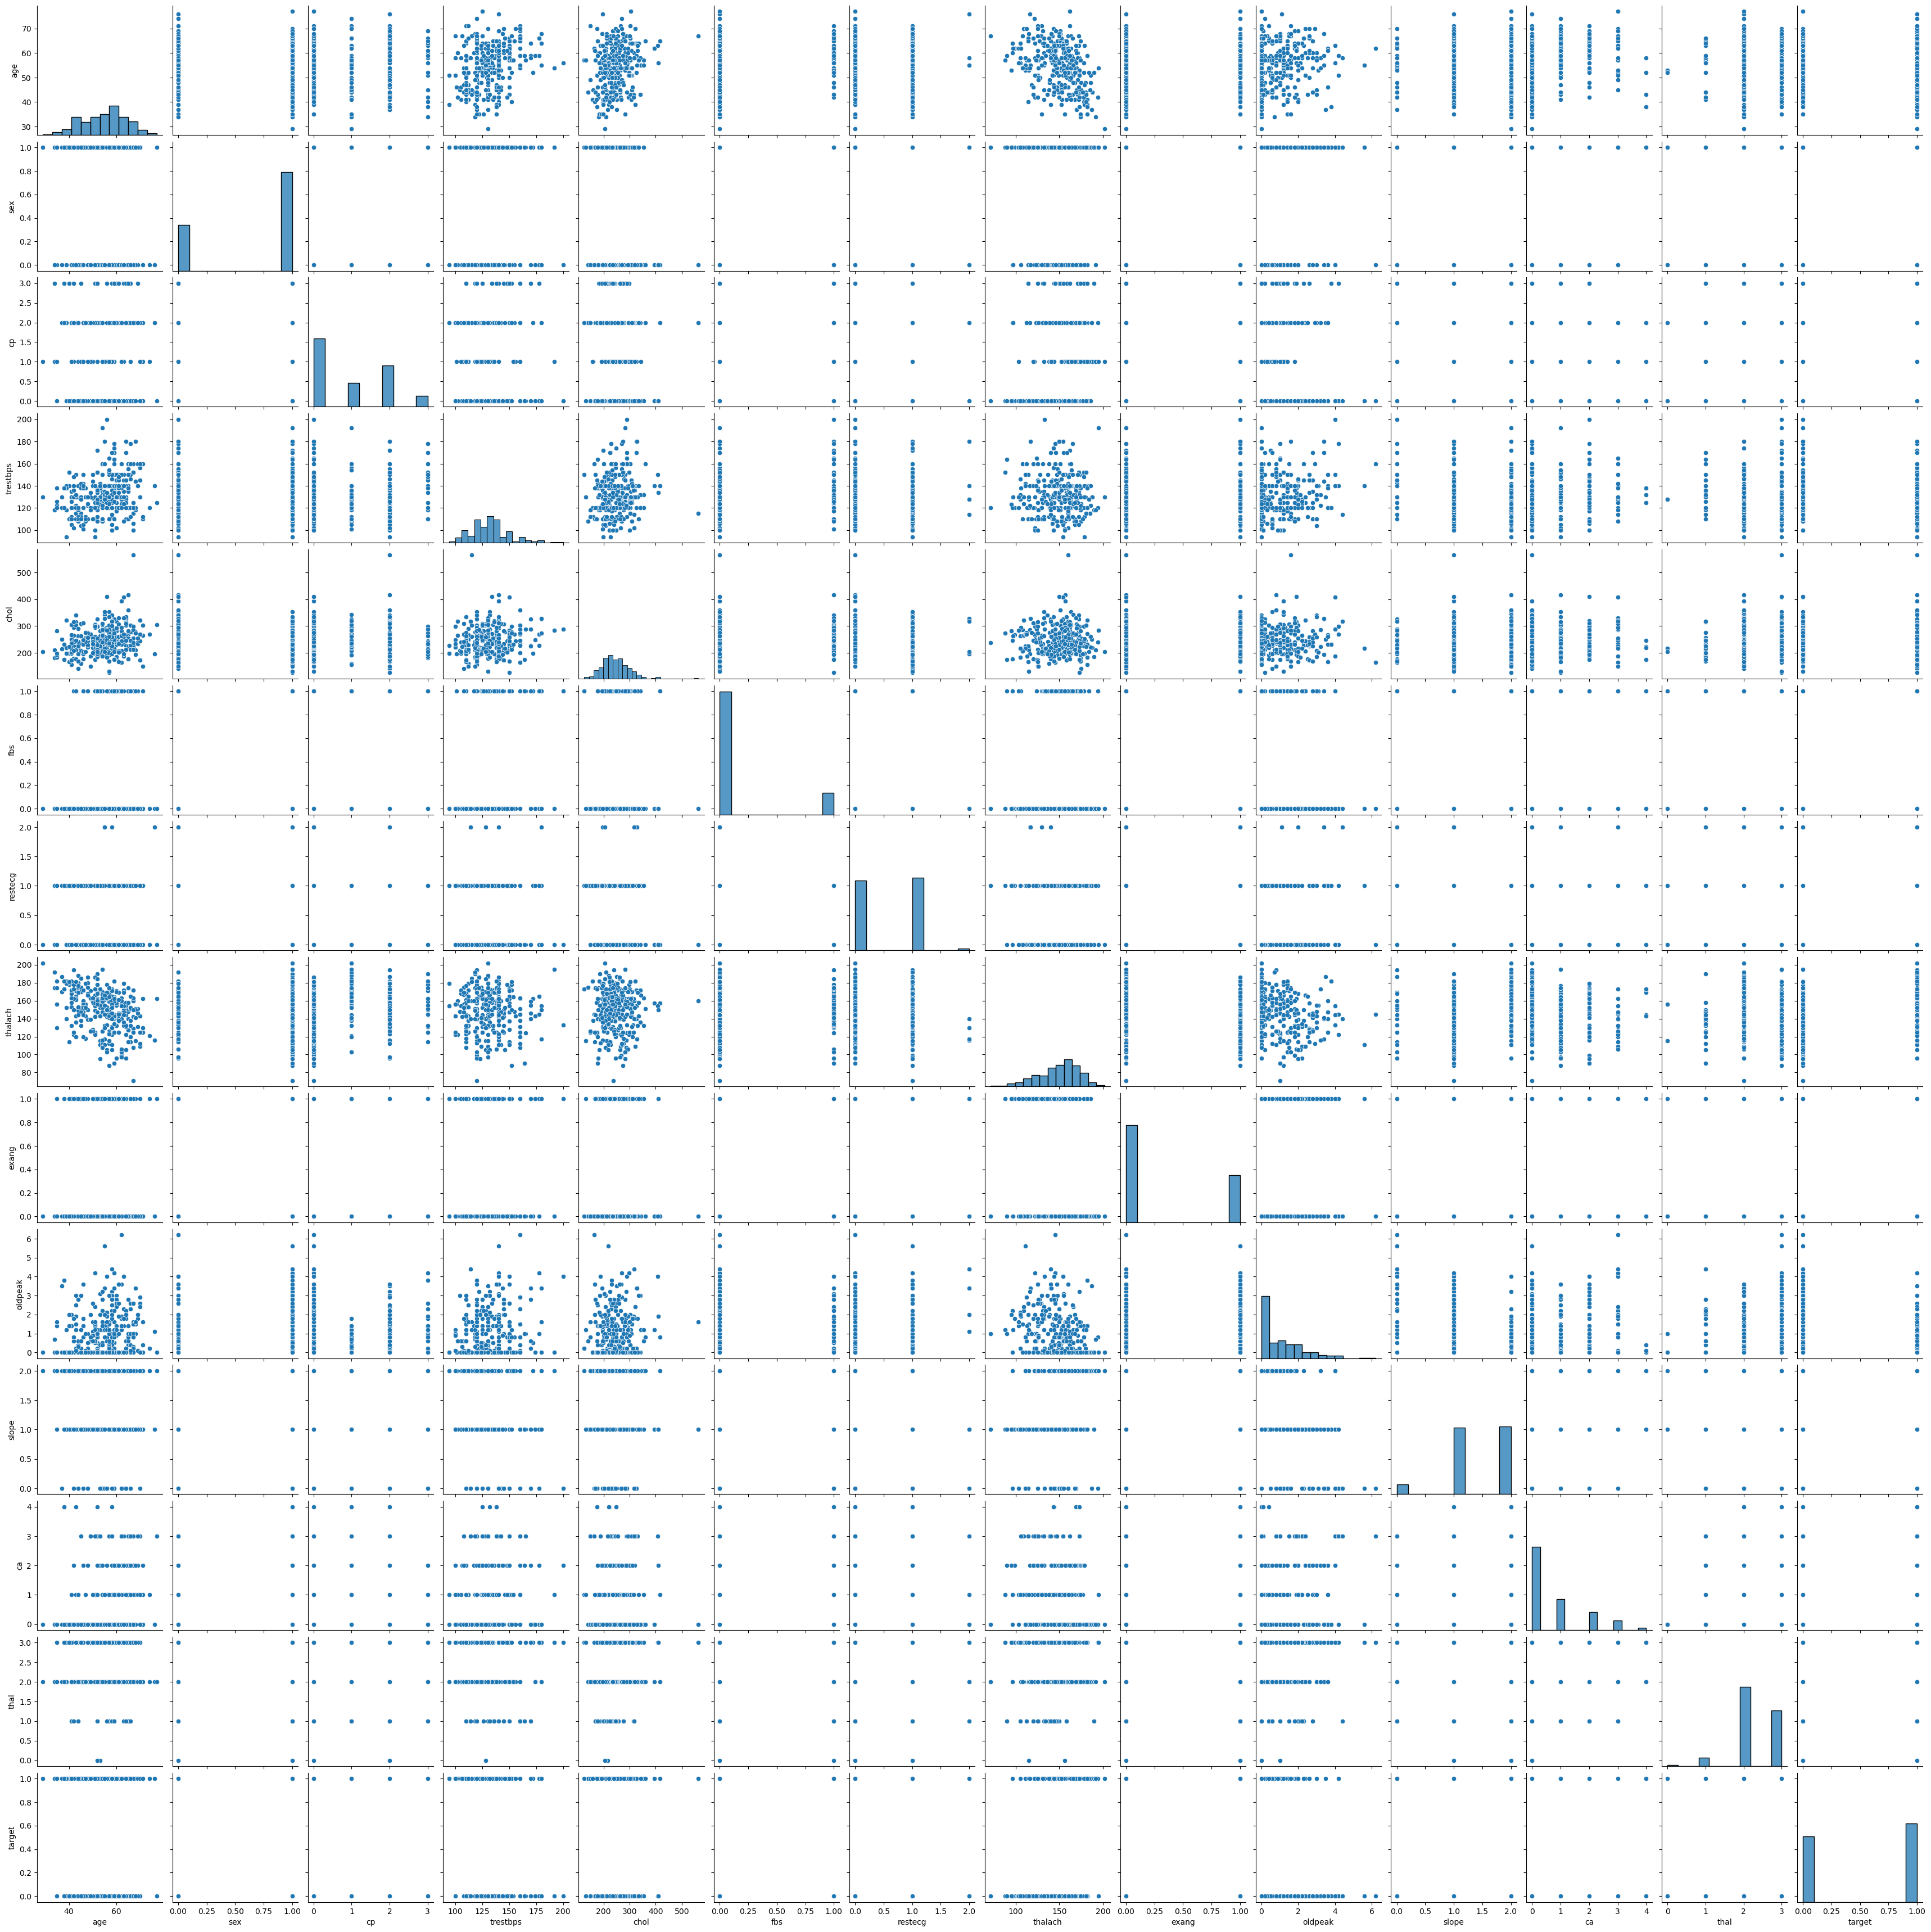

In [7]:
sns.pairplot(df, height=2.5);

In [8]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


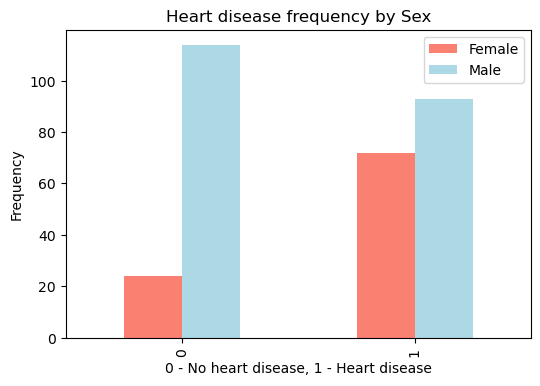

In [9]:
ax=pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(6, 4))
plt.title('Heart disease frequency by Sex')
plt.xlabel('0 - No heart disease, 1 - Heart disease')
plt.ylabel('Frequency')
plt.legend(['Female', 'Male']);

### Age vs Max heart rate by disease

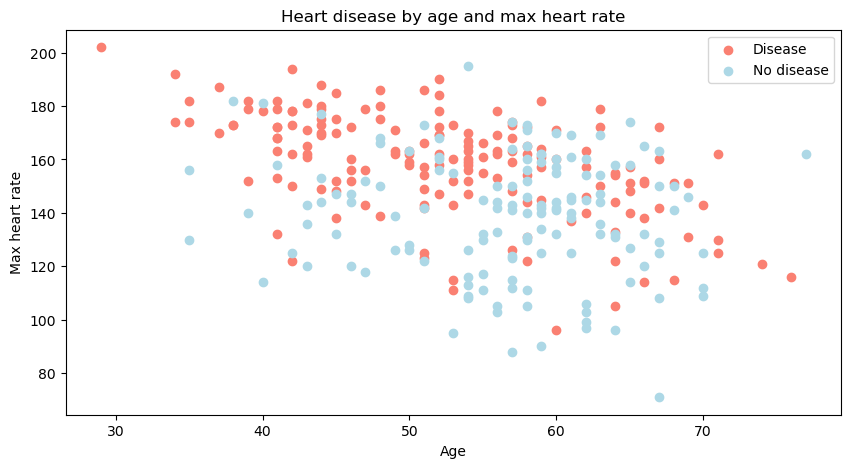

In [10]:
# Age vs heart beat
plt.figure(figsize=(10, 5))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='salmon')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue')
plt.title('Heart disease by age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No disease']);

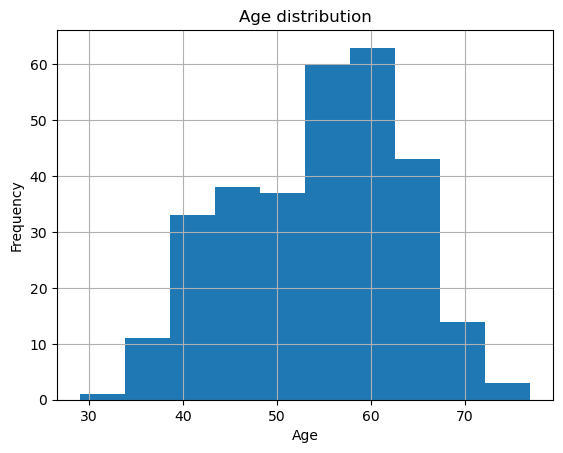

In [11]:
df['age'].hist()
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency');

### Heart fisease frequency by chest pain type

cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format:

0 = typical angina
1 = atypical angina
2 = non — anginal pain
3 = asymptotic

In [12]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


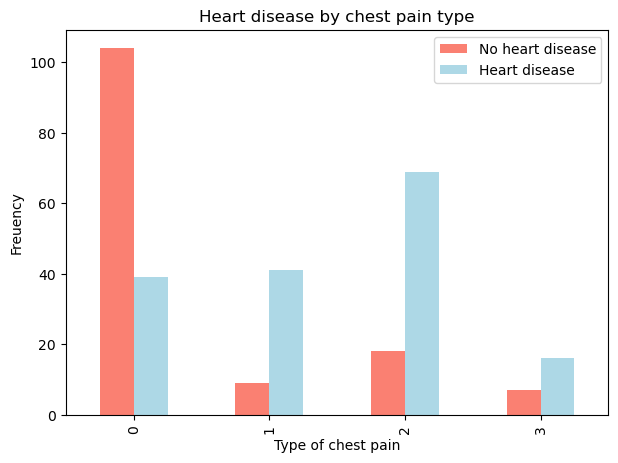

In [13]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(7, 5))
plt.title('Heart disease by chest pain type')
plt.xlabel('Type of chest pain')
plt.ylabel('Freuency')
plt.legend(['No heart disease', 'Heart disease']);

### trestbps and age by heart disease

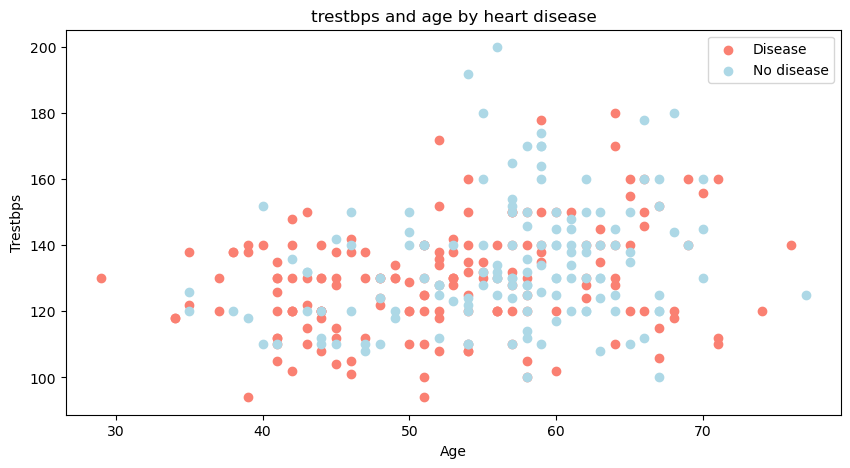

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(df.age[df.target == 1], df.trestbps[df.target == 1], color='salmon')
plt.scatter(df.age[df.target == 0], df.trestbps[df.target == 0], color='lightblue')
plt.title('trestbps and age by heart disease')
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.legend(['Disease', 'No disease']);

### restecg and heart disease

In [15]:
pd.crosstab(df.restecg, df.target)

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


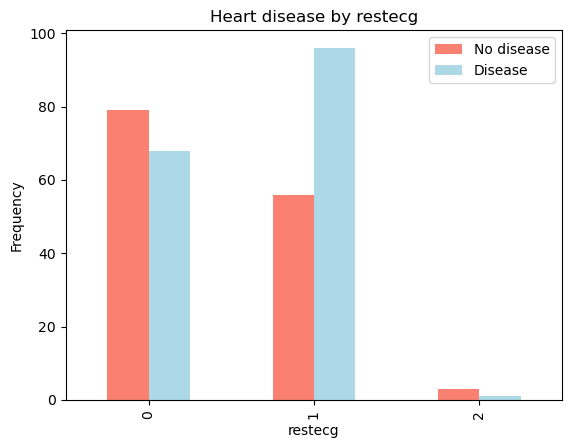

In [16]:
pd.crosstab(df.restecg, df.target).plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart disease by restecg')
plt.xlabel('restecg')
plt.ylabel('Frequency')
plt.legend(['No disease', 'Disease']);

### Age and cholestrol with heart disease

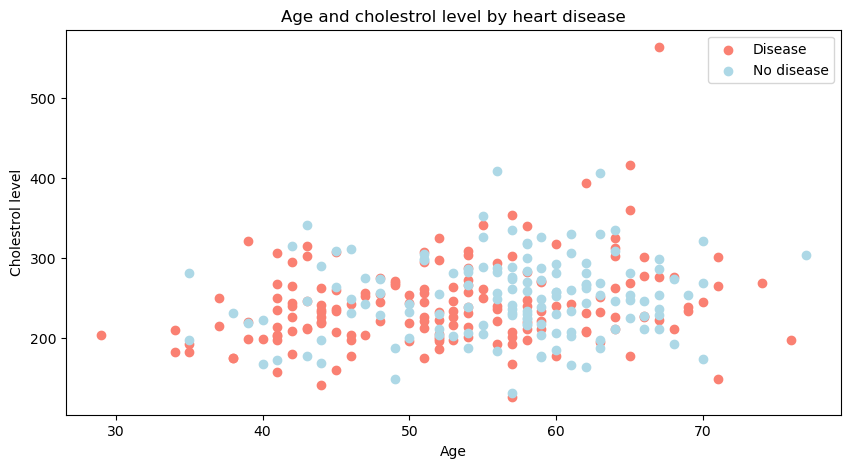

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(df.age[df.target == 1], df.chol[df.target == 1], color='salmon')
plt.scatter(df.age[df.target == 0], df.chol[df.target == 0], color='lightblue')
plt.title('Age and cholestrol level by heart disease')
plt.xlabel('Age')
plt.ylabel('Cholestrol level')
plt.legend(['Disease', 'No disease']);

### Correlation between independent variables

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


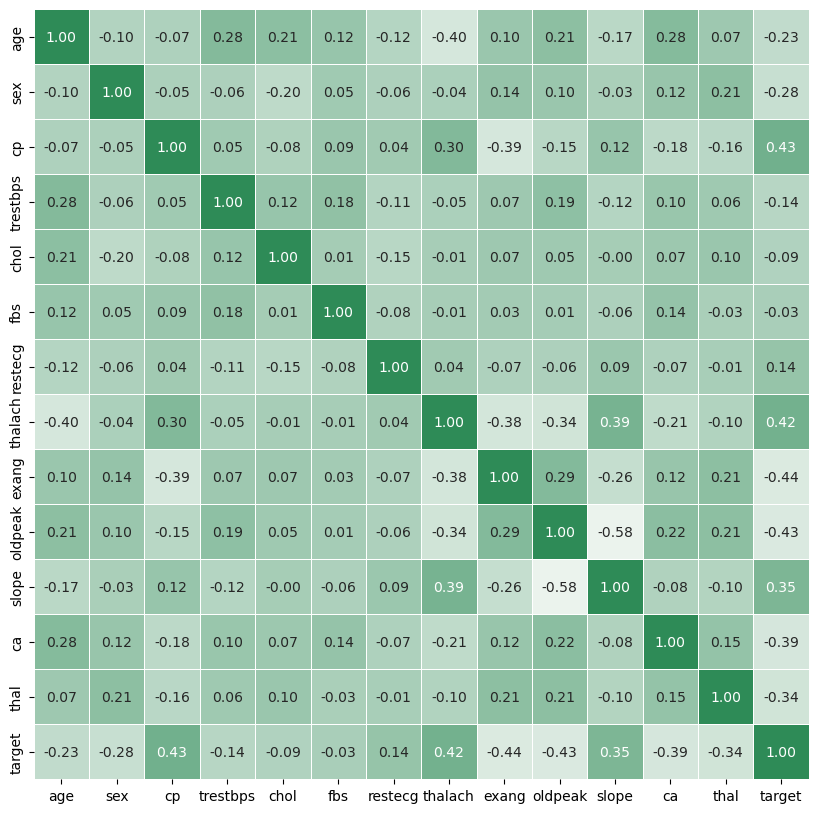

In [20]:
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(10, 10))
cmap=sns.light_palette('seagreen', as_cmap=True)
sns.heatmap(corr_matrix, fmt='.2f', linewidths=0.5, annot=True, cmap=cmap, cbar=False);

### Splitting the data

In [21]:
x=df.drop('target', axis=1)
y=df['target']

In [22]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


### Building the model

In [25]:
models={'logistic_regression': LogisticRegression(max_iter=10000),
        'KNN': KNeighborsClassifier(),
        'random_forest_classifier': RandomForestClassifier()}

def fit_and_score(models, x_train, y_train, x_test, y_test):
    np.random.seed(42)
    res={}
    for name, model in models.items():
        model.fit(x_train, y_train)
        res[name]=model.score(x_test, y_test)
    return res

In [26]:
scores=fit_and_score(models=models, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
scores

{'logistic_regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'random_forest_classifier': 0.8360655737704918}

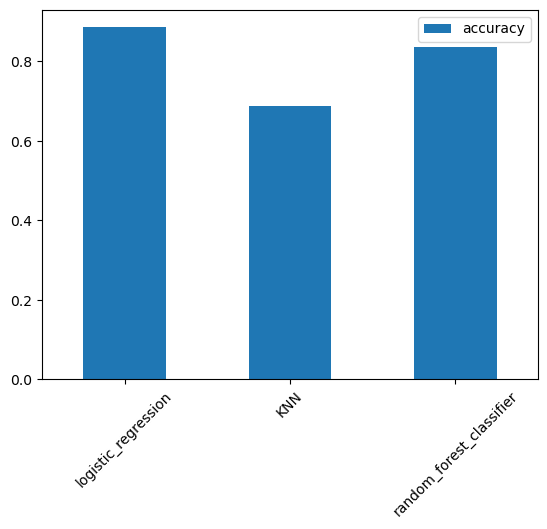

In [28]:
model_score=pd.DataFrame(scores, index=['accuracy'])
model_score.T.plot(kind='bar')
plt.xticks(rotation=45);

### Tuning the hyper parameters

In [29]:
# Tuning the KNN model
train_scores=[]
test_scores=[]
neighbors=range(1, 20)
knn_model=KNeighborsClassifier()
for i in neighbors:
    knn_model.set_params(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    train_scores.append(knn_model.score(x_train, y_train))
    test_scores.append(knn_model.score(x_test, y_test))

The best score is 75.41%


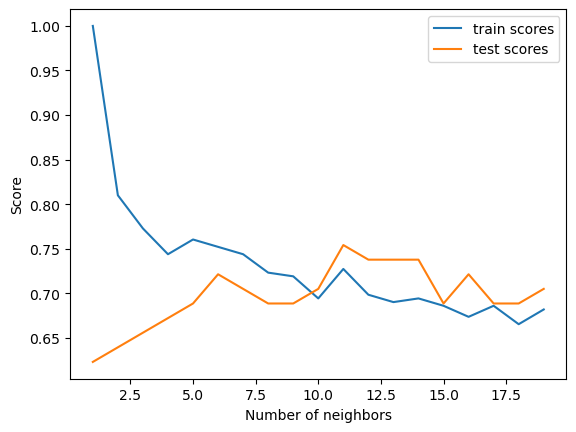

In [30]:
plt.plot(neighbors, train_scores, label='train scores')
plt.plot(neighbors, test_scores, label='test scores');
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.legend()
print(f'The best score is {max(test_scores)*100:.2f}%')

### Tuning hyperparameters using randomizedSearchCV

In [31]:
log_reg_grid={'C': np.logspace(-4, 4, 20),
              'solver': ['liblinear']}
rf_model_grid={'n_estimators': np.arange(10, 1000, 50),
               'min_samples_split': np.arange(2, 10, 2),
               'min_samples_leaf': np.arange(1, 20, 2),
               'max_depth': [None, 3, 5, 10]}

In [32]:
# Tuning the logistic regression
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, verbose=3, cv=5, n_iter=20)
# Fitting the rs_log_model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.653 total time=   0.1s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.604 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, solver=liblinear;, score=0.673 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, solver=liblinear;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, solver=liblinear;, score=0.735 total time=   0.0s


[CV 3/5] END .......C=10000.0, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END .......C=10000.0, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/5] END .......C=10000.0, solver=liblinear;, score=0.792 total time=   0.0s


In [33]:
print(rs_log_reg.best_params_)

{'solver': 'liblinear', 'C': 0.23357214690901212}


In [34]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [35]:
# Tuning the Random forest classifier model
np.random.seed(42)
rf_rs_model=RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_model_grid, cv=5, verbose=2, n_iter=20)
# Fittingthe train set
rf_rs_model.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=6, n_estimators=710; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=6, n_estimators=710; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=6, n_estimators=710; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=6, n_estimators=710; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=6, n_estimators=710; total time=   1.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_sample

[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=260; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=260; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=260; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=260; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=460; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=460; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=460; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=460; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=460; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=8, n_estimators=560

In [36]:
print(rf_rs_model.best_params_)

{'n_estimators': 110, 'min_samples_split': 6, 'min_samples_leaf': 17, 'max_depth': 3}


In [37]:
rf_rs_model.score(x_test, y_test)

0.8852459016393442

### Using GridSearchCV to tune hyper parameters

In [38]:
log_reg_grid={'C': np.logspace(-4, 4, 30),
              'solver': ['liblinear']}
gs_log_model=GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=1)
gs_log_model.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [39]:
print(gs_log_model.best_params_)

{'C': 0.20433597178569418, 'solver': 'liblinear'}


In [40]:
gs_log_model.score(x_test, y_test)

0.8852459016393442

### Evaluating the final model

In [41]:
# Evaluating the model
y_pred=gs_log_model.predict(x_test)

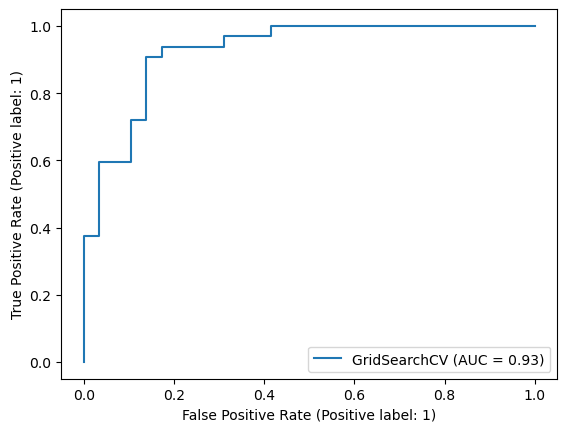

In [42]:
RocCurveDisplay.from_estimator(estimator=gs_log_model, X=x_test, y=y_test);

In [43]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[25  4]
 [ 3 29]]


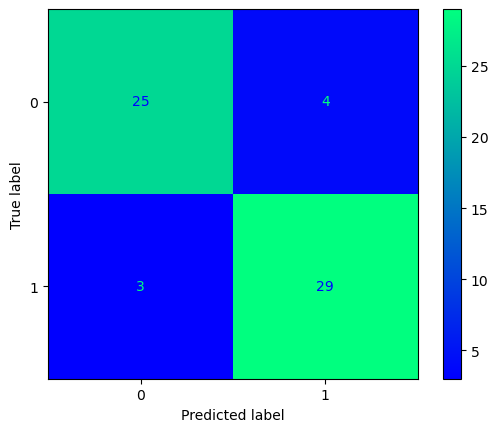

In [44]:
# Displaying the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred, labels=gs_log_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_log_model.classes_)
disp.plot(cmap='winter');

In [45]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculating the cross-validated precision, recall and f1-score

In [46]:
print(gs_log_model.best_params_)

{'C': 0.20433597178569418, 'solver': 'liblinear'}


In [47]:
# Creating a model with best parameters in gs_log_model
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')

# Cross validating the scores on different parameters
cv_acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy')
cv_precision=cross_val_score(clf, x, y, cv=5, scoring='precision')
cv_recall=cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_f1=cross_val_score(clf, x, y, cv=5, scoring='f1')

In [48]:
print(f'The cross validated accuracy is {np.mean(cv_acc)*100:.2f}%')
print(f'The cross validated precision is {np.mean(cv_precision):.2f}')
print(f'The cross validated recall is {np.mean(cv_recall):.2f}')
print(f'The cross validated f1 score is {np.mean(cv_f1):.2f}')

The cross validated accuracy is 84.47%
The cross validated precision is 0.82
The cross validated recall is 0.92
The cross validated f1 score is 0.87


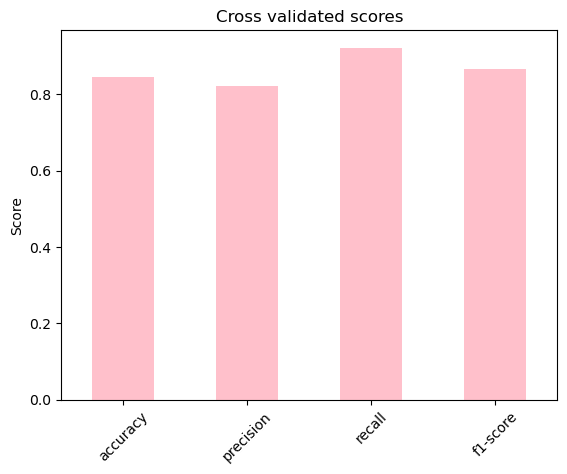

In [49]:
# Showing the cross validated results
scores_dict={'accuracy': np.mean(cv_acc),
             'precision': np.mean(cv_precision),
             'recall': np.mean(cv_recall),
             'f1-score': np.mean(cv_f1)}
cv_scores=pd.DataFrame(scores_dict, index=[0])

cv_scores.T.plot(kind='bar', color='pink', legend=False)
plt.title('Cross validated scores')
plt.ylabel('Score')
plt.xticks(rotation=45);

### Feature importance

In [50]:
# Creating and ftting the model to see the important features
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(x_train, y_train);

In [51]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [52]:
coef_dict=dict(zip(df.columns, list(clf.coef_[0])))
coef_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

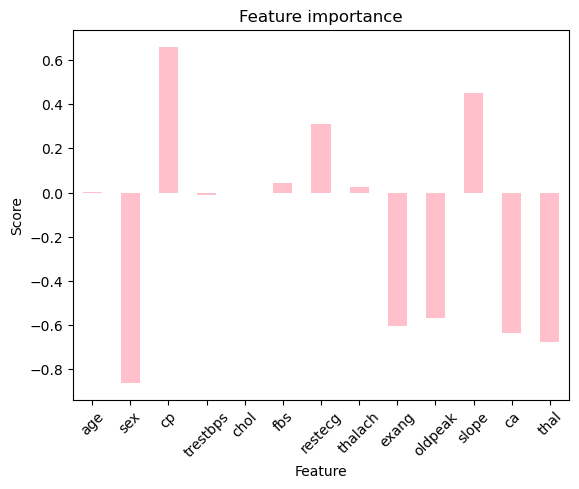

In [53]:
feature_imp=pd.DataFrame(coef_dict, index=[0])
feature_imp.T.plot(color='pink', legend=False, kind='bar')
plt.title('Feature importance')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.xticks(rotation=45);